##### John Franklin Crenshaw

.

Physics 566 Problem Set 1

January 24, 2019

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors

from astropy.constants import GM_sun
import time

In [2]:
# for better looking inline plots
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 2.5
###### *Write a Python program to compute and print the transmission and reflection probabilities ( $T$, $R$ respectively) for a quantum potential step.*

For a particle of mass $m$ and energy $E$ encountering a potential step $V$, the probabilities are
$$ T = \frac{4 k_1 k_2}{(k_1 + k_2)^2} \hspace{2cm} R = \left( \frac{k_1 - k_2}{k_1 + k_2} \right)^2, $$
where $k_1 = \sqrt{2mE}/\hbar$, $\ \ k_2 = \sqrt{2m(E-V)}/\hbar$.

Notice that the factors of $2m$ and $\hbar$ in $k_1$ and $k_2$ divide out. The probabilities are only dependent on E and V.

In [3]:
# Functions to calculate probabilites. Note that as the probabilites 
# are independent of hbar and 2m, I omit these factors

def trans_prob(E,V):
    """Calculate transmission probability for a quantum potential step.
    
    Calculate the probability that a particle of energy E passes a 1D 
    quantum potential step V. E and V must be of the same units.
    """
    k1 = math.sqrt(E)
    k2 = math.sqrt(E-V)
    return 4*k1*k2/(k1+k2)**2

def refl_prob(E,V):
    """Calculate reflection probability for a quantum potential step.
    
    Calculate the probability that a particle of energy E reflects off
    a 1D quantum potential step V. E and V must be of the same units.
    """
    k1 = math.sqrt(E)
    k2 = math.sqrt(E-V)
    return (k1-k2)**2/(k1+k2)**2

In [4]:
# Set parameters
V = 9 # potential step, eV
E = 10 # particle energy, eV

# Calculate probabilites
T = trans_prob(E,V)
R = refl_prob(E,V)

# Print results
print(("For particle of energy {0} eV encountering a potential step "+
      "of {1} eV:").format(E,V))
print("Transmission Prob. = {0:.2f}".format(T))
print("Reflection Prob.   = {0:.2f}".format(R))

For particle of energy 10 eV encountering a potential step of 9 eV:
Transmission Prob. = 0.73
Reflection Prob.   = 0.27


***
#### (2) CP 2.6
###### *Write a Python program to calculate orbital period and eccentricity from the perihelion distance and speed.*

From Kepler's Laws, it can be derived that an orbit has period
$$ T = \frac{2\pi ab}{\ell_1 v_1},$$ 
and eccentricity 
$$ e = \frac{\ell_2 - \ell_1}{\ell_2 + \ell_1},$$ 
where $a=\frac{1}{2}(\ell_1+\ell_2)$ and $b=\sqrt{\ell_1 \ell_2}$ are the semi-major and semi-minor axes of the orbit.

Given $\ell_1$ and $v_1$, we can calculate $v_2$ as the smaller root of the quadratic equation
$$ v_2^2 - \frac{2GM}{v_1 \ell_1}v_2-\left[ v_1^2-\frac{2GM}{\ell_1}\right] = 0. $$
Once we have $v_2$, we can calculate $\ell_2$ using $\ell_1 v_1 = \ell_2 v_2$.

In [5]:
GM = GM_sun.value # Nominal solar mass parameter, m^3/s^2

def orbit(l1,v1):
    """Calculate properties of orbit given perihelion dist and speed.
    
    Given the perihelion distance and speed (l1,v1), calculate the
    orbit's aphelion distance and speed (l2,v2), period (T), and 
    eccentricity (e). Returns tuple (T,e,l2,v2). Assumes heliocentric
    orbit and uses SI units.
    """
    # calculate aphelion speed from quadratic equation
    b = -2*GM/(v1*l1)
    c = -(v1**2 - 2*GM/l1)
    v2 = (-b - math.sqrt(b**2 - 4*c))/2
    
    # aphelion distance
    l2 = l1*v1/v2
    
    # semi-major and semi-minor axes
    a = 0.5*(l1+l2)
    b = math.sqrt(l1*l2)
    
    # period and eccentricity
    T = 2*math.pi*a*b/(l1*v1)
    e = (l2-l1)/(l2+l1)
    
    return T,e,l2,v2

def years_and_days(t):
    """Return (years,days) given time in seconds. 
    
    Uses 24 hour day, 365.25 day year."""
    days = t/(3600*24)
    years = days//365.25
    days -= years*365.25
    return years,days

In [6]:
# Earth
l1 = 1.4710e11 # perihelion distance, m
v1 = 3.0287e4 # perihelion speed, m/s
T,e,l2,v2 = orbit(l1,v1)
Tyears,Tdays = years_and_days(T)
print("Earth's orbit:")
print("period = {0:.0f} year, {1:.1f} days".format(Tyears,Tdays))
print("eccentricity = {0:.3f}\n".format(e))

# Halley's comet
l1 = 8.7830e10 # perihelion distance, m
v1 = 5.4529e4 # perihelion speed, m/s
T,e,l2,v2 = orbit(l1,v1)
Tyears,Tdays = years_and_days(T)
print("Orbit of Halley's Comet:")
print("period = {0:.0f} years, {1:.1f} days".format(Tyears,Tdays))
print("eccentricity = {0:.3f}".format(e))

Earth's orbit:
period = 1 year, 0.0 days
eccentricity = 0.017

Orbit of Halley's Comet:
period = 77 years, 345.4 days
eccentricity = 0.968


***
#### (3) CP 2.9
###### *Write a Python program to calculate the Madelung constant for sodium chloride.*

The Madelung constant gives the total electric potential felt by an atom in a solid. 

Sodium chloride crystals are composed of alternating sodium and chlorine atoms, which charges $+e$ and $-e$, respectively. If atoms in the lattice are labeled $(i,j,k)$, and consider a sodium atom centered at the origin, then sodium atoms sit where $i+j+k$ is even, and chlorine atoms sit where $i+j+k$ is odd.

Assuming the atoms have a lattice separation $a$, then the potential at the origin due to a single atom in the lattice is
$$ V(i,j,k) = (-1)^{i+j+k} \frac{e}{4\pi \epsilon_0 a \sqrt{i^2+j^2+k^2}}. $$
To calculate the Madelung constant, you must sum over an infinite number of atoms, but its value can be approximated the sum
$$ V_{total} \approx \sum_{\ \ \ i,j,k=-L \\ \text{not}\ i=j=k=0}^L V(i,j,k) = \frac{e}{4 \pi \epsilon_0 a}M,$$
for large $L$.

In [7]:
# get the current time so I can see how long this takes
start = time.time()

# perform the sum to calculate M
M = 0
L = 120
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if i != 0 or j != 0 or k != 0:
                M += (-1)**(i+j+k)/math.sqrt(i**2 + j**2 + k**2)
                
print(("The Madelung constant for NaCl is approximately "+
      "{0:.3f}.").format(abs(M)))

# print how long it took
elapsed_time = time.time() - start
print("This calculation took {0:.1f} seconds.".format(elapsed_time))

The Madelung constant for NaCl is approximately 1.743.
This calculation took 33.6 seconds.


***
#### (4) CP 3.6
###### *Write a Python program to create the Feigenbaum plot using the logistic map.*

A famous example of chaos is displayed by the logistic map
$$ x_{n+1} = rx_n(1-x_n), $$
which is iterated for some initial value $x_0$. For each pair $x_0$ and $r$, the series either:
1. converges to a 'fixed point'
2. settles into a periodic pattern, called a 'limit cycle'
3. fluctuates with no detectable pattern

Below I choose $x_0 = \frac{1}{2}$ and vary $r$ in the range 1-4. I iterate 1,000 times and then plot the subsequent 1,000 iterations vs $r$.

In [8]:
# arrays of data
r = np.linspace(1,4,301)
x = np.full(301,0.5)

# iteratively update x array according to logistic map
for i in range(1000):
    x = r*x*(1-x)
    
# create new arrays to hold all data for the next 1,000 iterations
R = []
X = []

# do 1,000 more iterations and save all the data
for i in range(1000):
    x = r*x*(1-x)
    R.extend(r)
    X.extend(x)

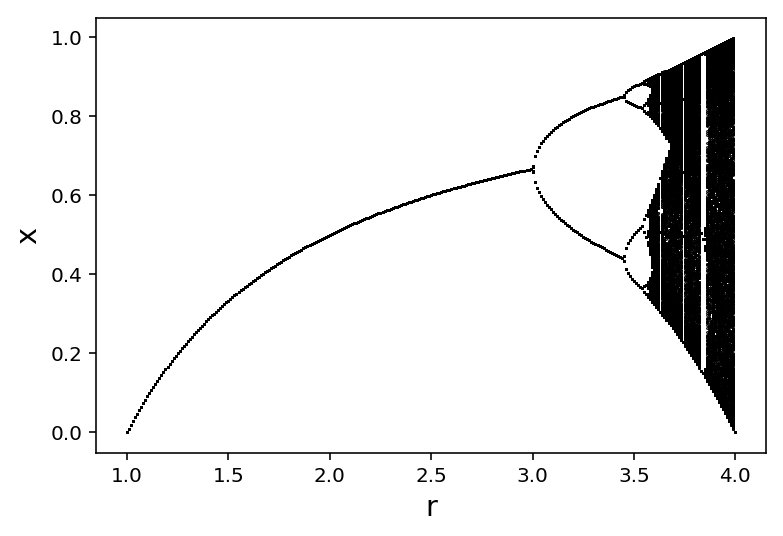

In [9]:
# plot x vs r
fig,ax = plt.subplots(1,1)
ax.scatter(R,X,marker='.',s=0.7,c='black')

# axis labels
ax.set_xlabel('r',fontsize='x-large')
ax.set_ylabel('x',fontsize='x-large')

plt.show()

You can see that the series is stable until about r=3, at which point it bifurcates. It bifurcates again around r=3.5, then becomes chaotic shortly thereafter. Interestingly, there appears to be a region around 3.75 where the chaos briefly stops.

***
#### (5) CP 3.7
###### *Write a Python program to create an image of the Mandelbrot Set.*

The Mandelbrot set is created by iterating the equation $z_{n+1} = z_n^2 + c$, where $z_0 = 0$ and c is a complex constant. To create the famous image of the set, you iterate over the complex plane, with $c = x + iy$, and truncate each iteration when $|z| > 2$. I record the iteration at which each point in the plane crosses the threshold, and create a 2D heat map of these values.

In [10]:
def mandelbrot_set(xmin=-2,xmax=2,ymin=-2,ymax=2,nsamples=1000,niter=100):
    """Calculate the Mandelbrot set on the complex plane."""
    
    # empty array of x,y points
    xi = np.empty([nsamples,nsamples],float)
    
    # iterate across the plane
    for i,x in enumerate(np.linspace(xmin,xmax,nsamples)):
        for j,y in enumerate(np.linspace(ymin,ymax,nsamples)):
            z = 0 # starting value
            c = complex(x,y) # constant determined by location in plane
            for k in range(niter):
                z = z*z + c # iterate
                if abs(z) >= 2: # check threshold
                    xi[i,j] = k # assign cut-off iteration number
                    break
    
    # return the set
    return xi

First I will plot the full set so you can see the entire shape.

In [11]:
# first mandelbrot set. Large enough to see entire shape.
set1 = mandelbrot_set(-2,0.5,-1.25,1.25,2000,niter=300)

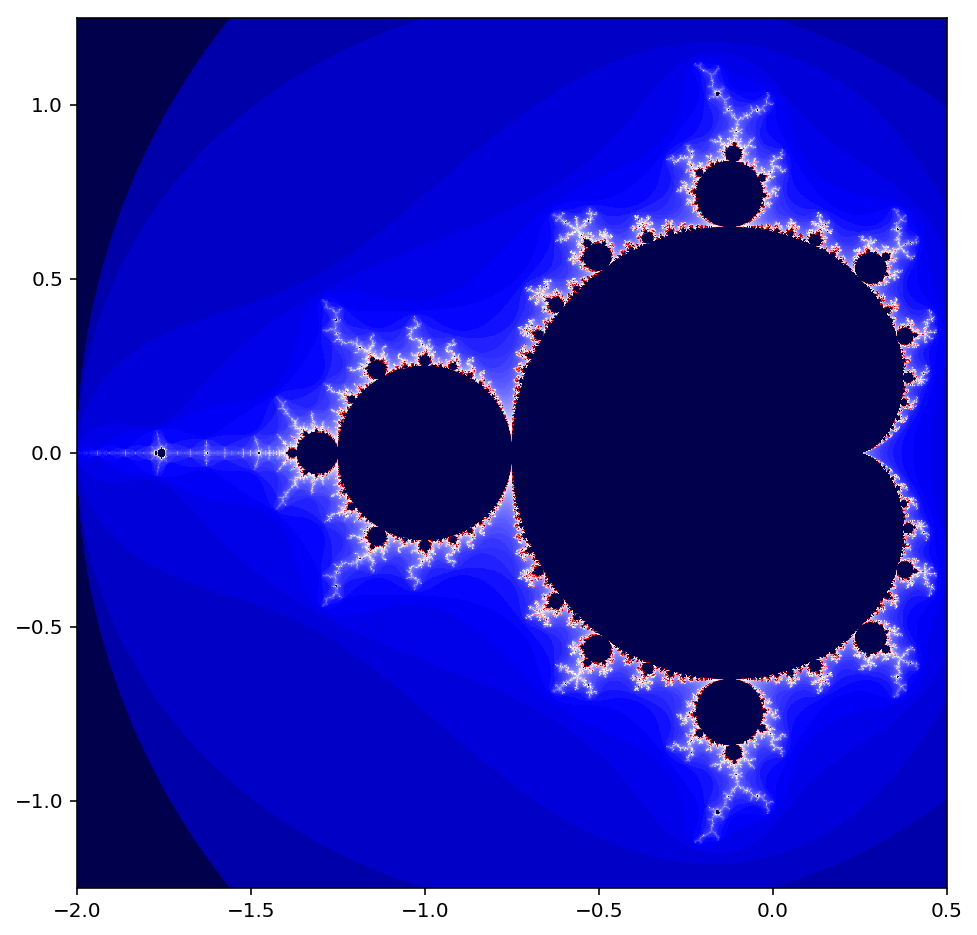

In [12]:
# plot the Mandelbrot set
fig2,ax2 = plt.subplots(1,1,figsize=(8,8))

# rescale colors to show more detail
norm = colors.PowerNorm(0.35)

# note that I transpose the data when plotting because imshow 
# has the x and y axes flipped
ax2.imshow(np.transpose(set1),origin='lower',cmap='seismic',norm=norm,
           extent=[-2,0.5,-1.25,1.25])
plt.show()

fig2.savefig('mandelbrot.png')

Now I will zoom in on some of the structure.

In [13]:
# second mandelbrot set, zoomed in
set2 = mandelbrot_set(-0.75,-0.747,0.063,0.066,2000,1000)

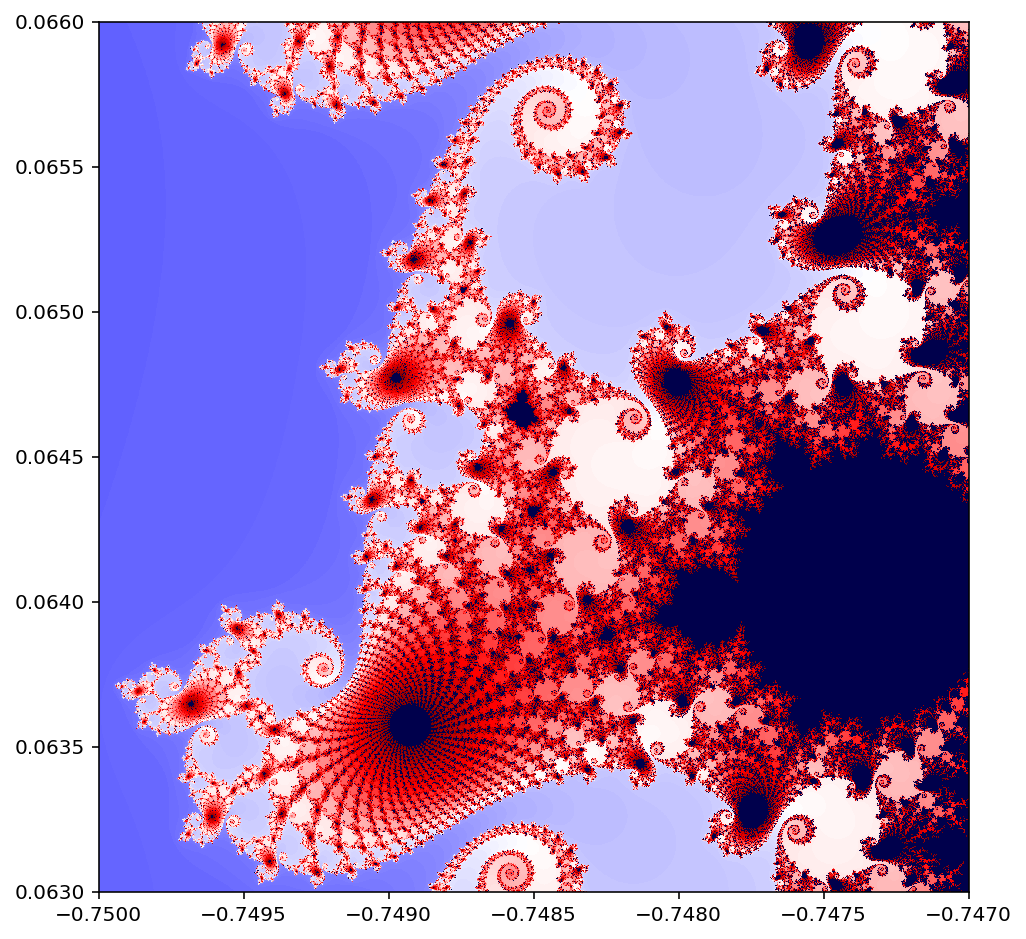

In [14]:
# plot the Mandelbrot set
fig3,ax3 = plt.subplots(1,1,figsize=(8,8))

# rescale colors to show more detail
norm = colors.PowerNorm(0.35)

# note that I transpose the data when plotting because imshow 
# has the x and y axes flipped
ax3.imshow(np.transpose(set2),origin='lower',cmap='seismic',norm=norm,
           extent=[-0.75,-0.747,0.063,0.066])
plt.show()

fig3.savefig('mandelbrot_zoom.png')